# Redes Neuronales Convolucionales Profundas y Regularización

- Objetivo: Implementar redes convolucionales profundas, conocer el desempeño de los optimizadores y los efectos de regularización en el entrenamiento. Se conocerá el efecto de BatchNormalization antes y después de la activación

- Se apilan dos a tres capas convolucionales en redes VGG como muestra K. Simonyan y A. Zisserman en “Very Deep Convolutional Networks for Large-Scale Image Recognition” https://arxiv.org/abs/1409.1556


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras



fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
                   'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


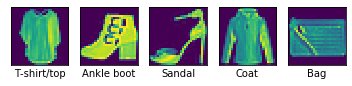

In [3]:
for i in range(5):
    rand_image_idx = np.random.randint(0, y_train.shape[0])
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(x_train[rand_image_idx])
    plt.xlabel(class_names[y_train[rand_image_idx]])
plt.show()

In [4]:
# escalar entre 0 y 1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255


print(x_train.shape) # (60000, 28, 28, 1)
print(x_test.shape)  # (10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Obtener dimensiones

In [5]:
x, y, channel = x_train.shape[1:]

input_shape = (x, y, channel)

In [6]:
epoch = 20
verbose = 1
batch = 50

## Deep CNN
- Red CNN profunda con 3 bloques de Conv2D y MaxPooling2D
- La activación es 'LeakyReLU'

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, LeakyReLU

In [8]:
def cnn():
    model = Sequential()
    
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None, input_shape = input_shape))
    model.add(LeakyReLU())
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(60, (2,2), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(Conv2D(60, (2,2), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2,2)))
    
  
    model.add(Flatten())

    model.add(Dense(32, activation = None))
    model.add(LeakyReLU())
    model.add(Dense(32, activation = None))
    model.add(LeakyReLU())
    model.add(Dense(10, activation = 'softmax'))
    
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model 

In [9]:
model = cnn()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 20)        3620      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 40)        3240      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 40)        0

In [11]:
history1 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 11s 261us/sample - loss: 0.5652 - accuracy: 0.7946 - val_loss: 0.3758 - val_accuracy: 0.8609
Epoch 2/20
42000/42000 [==============================] - 9s 208us/sample - loss: 0.3387 - accuracy: 0.8776 - val_loss: 0.3308 - val_accuracy: 0.8794
Epoch 3/20
42000/42000 [==============================] - 9s 213us/sample - loss: 0.2860 - accuracy: 0.8964 - val_loss: 0.2970 - val_accuracy: 0.8923
Epoch 4/20
42000/42000 [==============================] - 9s 215us/sample - loss: 0.2571 - accuracy: 0.9062 - val_loss: 0.2670 - val_accuracy: 0.9059
Epoch 5/20
42000/42000 [==============================] - 9s 211us/sample - loss: 0.2357 - accuracy: 0.9147 - val_loss: 0.2782 - val_accuracy: 0.8986
Epoch 6/20
42000/42000 [==============================] - 9s 211us/sample - loss: 0.2191 - accuracy: 0.9193 - val_loss: 0.2610 - val_accuracy: 0.9058
Epoch 7/20
42000/42000 [=========================

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)

print('\nTest acccuracy:', test_acc)


Test acccuracy: 0.9125



- Red CNN profunda con 2 bloques de Conv2D y MaxPooling2D

In [13]:
def cnn():
    model = Sequential()
    
   
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None, input_shape = input_shape))
    model.add(LeakyReLU())
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2,2)))
  
    model.add(Flatten())

    model.add(Dense(32, activation = None))
    model.add(LeakyReLU())
    model.add(Dense(32, activation = None))
    model.add(LeakyReLU())
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model 


   

In [14]:
model = cnn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 28, 28, 20)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 20)        3620      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 40)        3240      
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 40)       

In [15]:
history2 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 8s 191us/sample - loss: 0.4939 - accuracy: 0.8229 - val_loss: 0.3664 - val_accuracy: 0.8673
Epoch 2/20
42000/42000 [==============================] - 7s 177us/sample - loss: 0.3115 - accuracy: 0.8886 - val_loss: 0.3045 - val_accuracy: 0.8869
Epoch 3/20
42000/42000 [==============================] - 7s 177us/sample - loss: 0.2624 - accuracy: 0.9053 - val_loss: 0.2547 - val_accuracy: 0.9107
Epoch 4/20
42000/42000 [==============================] - 7s 177us/sample - loss: 0.2323 - accuracy: 0.9147 - val_loss: 0.2598 - val_accuracy: 0.9072
Epoch 5/20
42000/42000 [==============================] - 8s 180us/sample - loss: 0.2082 - accuracy: 0.9225 - val_loss: 0.2560 - val_accuracy: 0.9147
Epoch 6/20
42000/42000 [==============================] - 8s 179us/sample - loss: 0.1893 - accuracy: 0.9302 - val_loss: 0.2606 - val_accuracy: 0.9088
Epoch 7/20
42000/42000 [==========================

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)

print('\nTest acccuracy:', test_acc)


Test acccuracy: 0.9081


## Regularización

- Batch norm antes de activación con RMSprop 

In [17]:
from tensorflow.keras.layers import BatchNormalization

In [18]:
def cnn():
    model = Sequential()
    
  
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None, input_shape = input_shape))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2,2)))
    
  
    model.add(Flatten())

    model.add(Dense(32, activation = None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Dense(32, activation = None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model 


   

In [19]:
model = cnn()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 20)        200       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 20)        80        
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 20)        3620      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 20)        80        
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 20)       

In [20]:
history3 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 11s 266us/sample - loss: 0.4142 - accuracy: 0.8598 - val_loss: 0.4039 - val_accuracy: 0.8492
Epoch 2/20
42000/42000 [==============================] - 9s 226us/sample - loss: 0.2719 - accuracy: 0.9004 - val_loss: 0.2971 - val_accuracy: 0.8968
Epoch 3/20
42000/42000 [==============================] - 9s 223us/sample - loss: 0.2316 - accuracy: 0.9153 - val_loss: 0.2578 - val_accuracy: 0.9059
Epoch 4/20
42000/42000 [==============================] - 9s 222us/sample - loss: 0.2046 - accuracy: 0.9258 - val_loss: 0.2903 - val_accuracy: 0.9032
Epoch 5/20
42000/42000 [==============================] - 9s 222us/sample - loss: 0.1847 - accuracy: 0.9326 - val_loss: 0.2593 - val_accuracy: 0.9082
Epoch 6/20
42000/42000 [==============================] - 9s 221us/sample - loss: 0.1674 - accuracy: 0.9380 - val_loss: 0.2633 - val_accuracy: 0.9084
Epoch 7/20
42000/42000 [=========================

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)

print('\nTest acccuracy:', test_acc)


Test acccuracy: 0.9005


- Batch norm antes de activación con Adam

In [22]:
def cnn():
    model = Sequential()
    
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None, input_shape = input_shape))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2,2)))
    
  
    model.add(Flatten())

    model.add(Dense(32, activation = None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Dense(32, activation = None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model 


   

   

In [23]:
model = cnn()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 20)        200       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 20)        80        
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 20)        3620      
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 20)        80        
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 20)       

In [24]:
history4 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 10s 248us/sample - loss: 0.4324 - accuracy: 0.8598 - val_loss: 0.3027 - val_accuracy: 0.8914
Epoch 2/20
42000/42000 [==============================] - 9s 217us/sample - loss: 0.2686 - accuracy: 0.9045 - val_loss: 0.2918 - val_accuracy: 0.8944
Epoch 3/20
42000/42000 [==============================] - 10s 228us/sample - loss: 0.2304 - accuracy: 0.9160 - val_loss: 0.2799 - val_accuracy: 0.8988
Epoch 4/20
42000/42000 [==============================] - 9s 225us/sample - loss: 0.2026 - accuracy: 0.9268 - val_loss: 0.2702 - val_accuracy: 0.9035
Epoch 5/20
42000/42000 [==============================] - 9s 224us/sample - loss: 0.1814 - accuracy: 0.9347 - val_loss: 0.2670 - val_accuracy: 0.9041
Epoch 6/20
42000/42000 [==============================] - 9s 217us/sample - loss: 0.1659 - accuracy: 0.9401 - val_loss: 0.2491 - val_accuracy: 0.9138
Epoch 7/20
42000/42000 [========================

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)

print('\nTest acccuracy:', test_acc)


Test acccuracy: 0.9076


## Train metrics

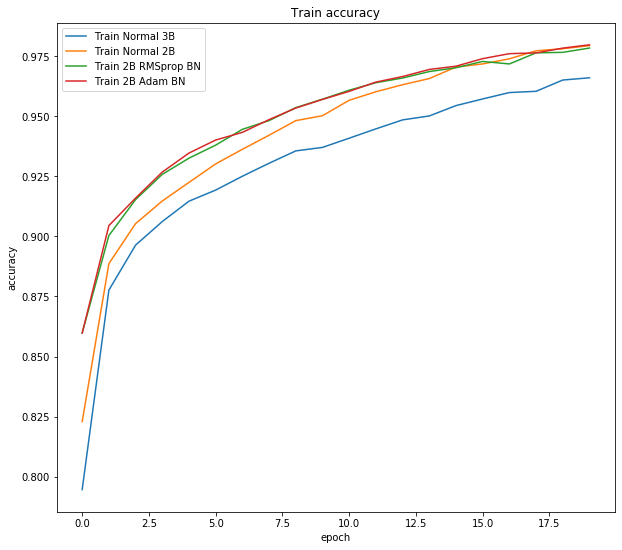

In [26]:
#plot
plt.figure(figsize=(10,9))

plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history4.history['accuracy'])


plt.legend(['Train Normal 3B',
            'Train Normal 2B',
            'Train 2B RMSprop BN',
            'Train 2B Adam BN'])

plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


## Test metrics

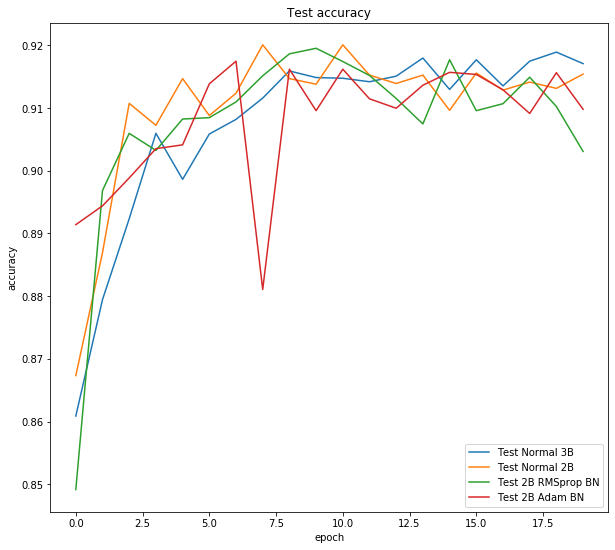

In [27]:
#plot
plt.figure(figsize=(10,9))
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])

plt.legend(['Test Normal 3B',
            'Test Normal 2B',
            'Test 2B RMSprop BN',
            'Test 2B Adam BN'])

plt.title('Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()


## Batch Normalization después de activación

In [28]:
from tensorflow.keras.layers import Activation

In [29]:
def cnn():
    model = Sequential()
    
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None, input_shape = input_shape))
    model.add(LeakyReLU())
    model.add(BatchNormalization()) 
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(BatchNormalization()) 
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(BatchNormalization()) 
    model.add(MaxPooling2D((2,2)))
    
  
    model.add(Flatten())

    model.add(Dense(32, activation = None))
    model.add(LeakyReLU())
    model.add(BatchNormalization()) 
    model.add(Dense(32, activation = None))
    model.add(LeakyReLU())
    model.add(BatchNormalization()) 
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model 


   

   

In [30]:
model = cnn()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 28, 28, 20)        80        
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 20)        3620      
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 28, 28, 20)        80        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 20)       

In [31]:
history5 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 11s 258us/sample - loss: 0.4045 - accuracy: 0.8625 - val_loss: 0.3124 - val_accuracy: 0.8869
Epoch 2/20
42000/42000 [==============================] - 9s 223us/sample - loss: 0.2665 - accuracy: 0.9047 - val_loss: 0.2647 - val_accuracy: 0.9034
Epoch 3/20
42000/42000 [==============================] - 9s 226us/sample - loss: 0.2294 - accuracy: 0.9187 - val_loss: 0.3171 - val_accuracy: 0.8891
Epoch 4/20
42000/42000 [==============================] - 9s 218us/sample - loss: 0.2032 - accuracy: 0.9262 - val_loss: 0.2359 - val_accuracy: 0.9173
Epoch 5/20
42000/42000 [==============================] - 9s 225us/sample - loss: 0.1832 - accuracy: 0.9340 - val_loss: 0.2916 - val_accuracy: 0.9048
Epoch 6/20
42000/42000 [==============================] - 10s 229us/sample - loss: 0.1662 - accuracy: 0.9400 - val_loss: 0.2681 - val_accuracy: 0.9092
Epoch 7/20
42000/42000 [========================

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)

print('\nTest acccuracy:', test_acc)


Test acccuracy: 0.9083


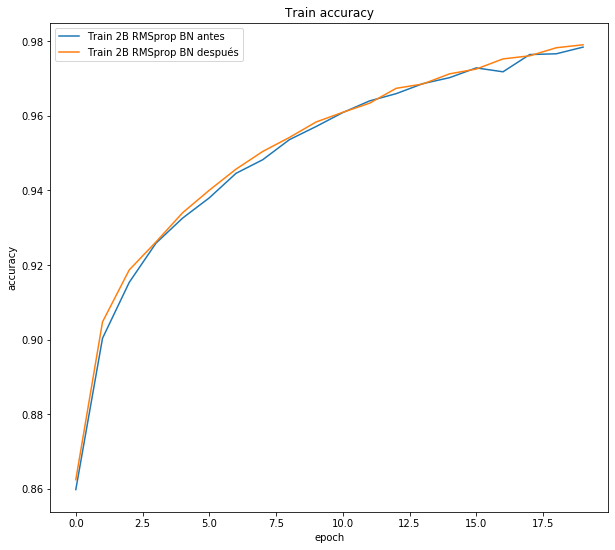

In [33]:
#plot
plt.figure(figsize=(10,9))


plt.plot(history3.history['accuracy'])
plt.plot(history5.history['accuracy'])


plt.legend(['Train 2B RMSprop BN antes',
            'Train 2B RMSprop BN después'])

plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


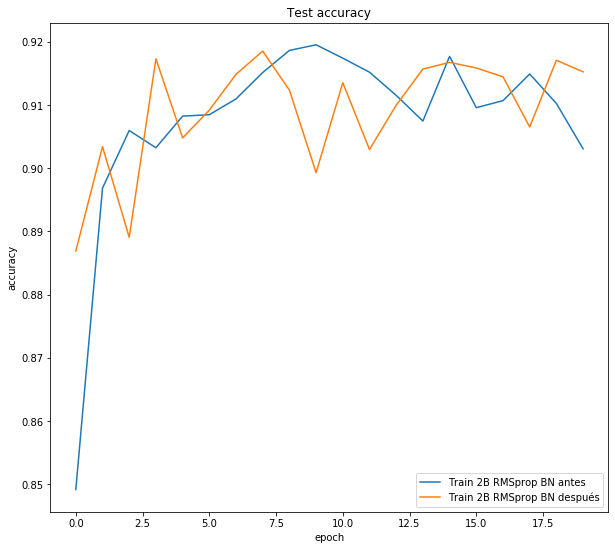

In [34]:
#plot
plt.figure(figsize=(10,9))


plt.plot(history3.history['val_accuracy'])
plt.plot(history5.history['val_accuracy'])


plt.legend(['Train 2B RMSprop BN antes',
            'Train 2B RMSprop BN después'])

plt.title('Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


- Modificar la arquitectura para entrenar en menos tiempo y obtener mejor test accuracy.
- Agregar otros métodos de regularización
- Experimentar con otro dataset
- Experimentar con el número de filtros, pool_size y kernel_size